<a href="https://colab.research.google.com/github/Aliaksandr-Borsuk/Recommender_Systems_project/blob/main/notebooks/08_results_and_conclusions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка


**Цель:**
- Собрать все результаты моделей в единый DataFrame.
- Визуализировать метрики (HitRate@10, NDCG@10, Coverage@10).
- Сделать выводы по эффективности моделей на warm-split MovieLens-1M.


**Данные:**
- Используется единый CSV-файл с результатами:
- - all_experiments_results.csv из data/results/.
- Все эксперименты выполнены на одном warm-split (251021_173655)
- - с единой оценкой без фильтрации по рейтингу,
- - с единым набором метрик.


## 01. Клонируем репозиторий. Подключаем GoogleDrive.

In [1]:
!rm -rf /content/Recommender_Systems_project
!git clone https://github.com/Aliaksandr-Borsuk/Recommender_Systems_project

Cloning into 'Recommender_Systems_project'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 158 (delta 84), reused 52 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (158/158), 700.90 KiB | 7.46 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [2]:
# подключаем диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 02. Импорты

In [3]:
import sys
sys.path.append("/content/Recommender_Systems_project/src")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Настройки
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

DATA = Path("/content/drive/MyDrive/Colab Notebooks/data/")
RESULTS_DIR = DATA / "results"

## 03. Загрузка всех результатов

In [7]:
csv_path = RESULTS_DIR / "all_experiments_results.csv"
df = pd.read_csv(csv_path)

# Порядок моделей по качеству (NDCG@10)
df = df.sort_values('ndcg@10', ascending=False)
print("Загружено моделей:", len(df))
display(df.round(4))

Загружено моделей: 10


,model_name,hit_rate@10,precision@10,recall@10,ndcg@10,map@10,coverage@10,timestamp,evaluation_date
3,truncated_svd_n_comp=5_n_iter=42,0.8517,0.3482,0.0455,0.3655,0.2473,0.0912,20251116_190936,"2025-11-16T19:09:36.863512,,,,,,,,,"
2,userKNN_bmp25_k=991,0.8361,0.3410,0.0437,0.3613,0.2447,0.0639,20251108_084943,"2025-11-08T08:49:43.731391,,,,,,,,,"
4,als_factors=5_iter=21_alpha=0.6_reg=0.02,0.8409,0.3402,0.0435,0.3588,0.2445,0.0956,20251210_110349,"2025-12-10T11:03:49.859474,,,,,,,,,"
5,ease_lambda=108727,0.8385,0.3385,0.0427,0.3568,0.2434,0.0456,20251211_185547,"2025-12-11T18:55:47.668555,,,,,,,,,"
1,itemKNN_tfidf_k=312,0.8122,0.3291,0.0407,0.3453,0.2336,0.0748,20251108_084840,"2025-11-08T08:48:40.783074,,,,,,,,,"
6,slim_alpha_0.47_l1_ratio_0.14,0.8254,0.3220,0.0415,0.3426,0.2258,0.0470,20251214_171141,NaN
7,NCF_BPR,0.8146,0.3156,0.0379,0.3283,0.2190,0.0369,20251228_162516,2025-12-28T16:25:16.373247
8,NCF_BCE,0.8014,0.3114,0.0370,0.3249,0.2173,0.0471,20251228_162658,2025-12-28T16:26:58.143923
9,TwoTowerHybrid,0.7656,0.2750,0.0324,0.2940,0.1890,0.0287,20260102_075229,2026-01-02T07:52:29.633199
0,Most_Popular,0.5156,0.1329,0.0156,0.1332,0.0687,0.0027,20251022_194247,"2025-10-22T19:42:47.576490,,,,,,,,,"


## 04. Визуализация метрик

### 4.1. Основные метрики (HitRate, NDCG, Coverage)

/tmp/ipython-input-1719011153.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-1719011153.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-1719011153.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')


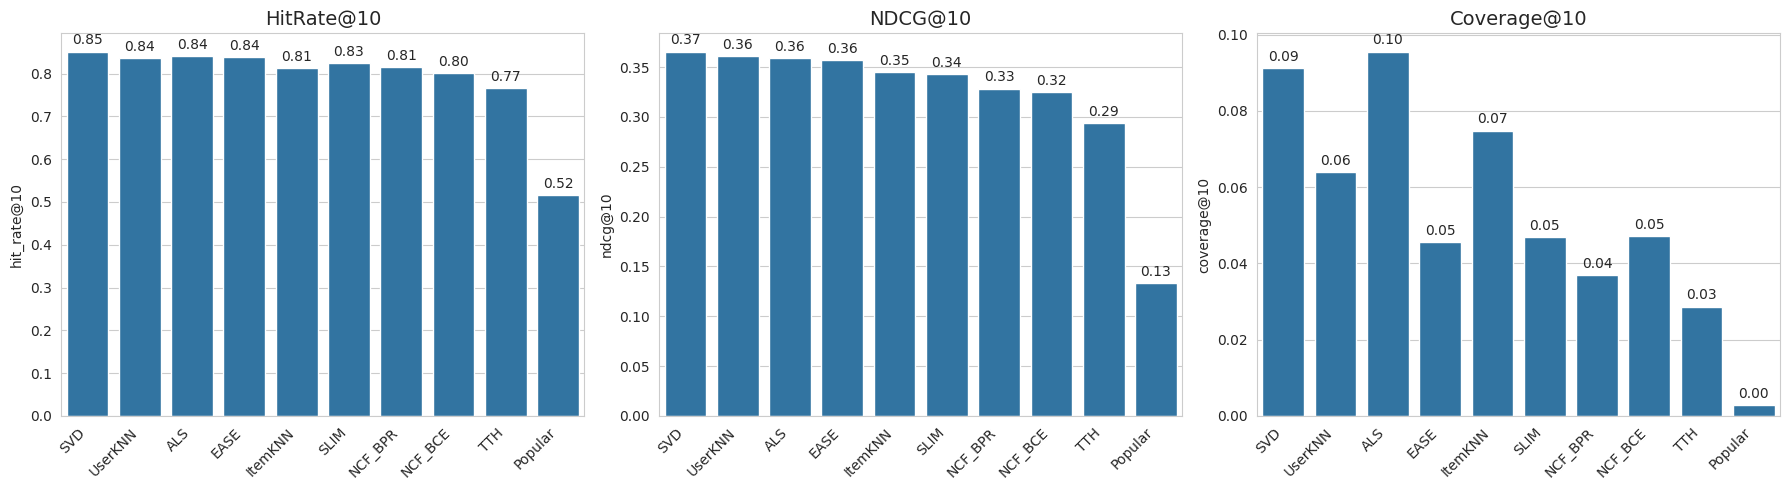

In [15]:
# Словарь для приведения к коротким именам (можно расширять)
rename_map = {
    'truncated_svd_n_comp=5_n_iter=42': 'SVD',
    'als_factors=5_iter=21_alpha=0.6_reg=0.02': 'ALS',
    'userKNN_bmp25_k=991': 'UserKNN',
    'itemKNN_tfidf_k=312': 'ItemKNN',
    'ease_lambda=108727': 'EASE',
    'slim_alpha_0.47_l1_ratio_0.14': 'SLIM',
    'TwoTowerHybrid' : 'TTH',
    'NCF_BCE': 'NCF_BCE',
    'NCF_BPR': 'NCF_BPR',
    'Most_Popular': 'Popular',
    'TTH': 'TwoTower'
}

df_plot = df.copy()

# Применяем короткие имена
df_plot['model_short'] = df_plot['model_name'].map(rename_map)


# График: HitRate@10, NDCG@10, Coverage@10
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, (metric, title) in enumerate([
    ('hit_rate@10', 'HitRate@10'),
    ('ndcg@10', 'NDCG@10'),
    ('coverage@10', 'Coverage@10')
]):
    sns.barplot(data=df_plot, x='model_short', y=metric, ax=ax[i])
    ax[i].set_title(title, fontsize=14)
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
    for container in ax[i].containers:
        ax[i].bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

## 4.2. Trade-off: NDCG@10 vs Coverage@10


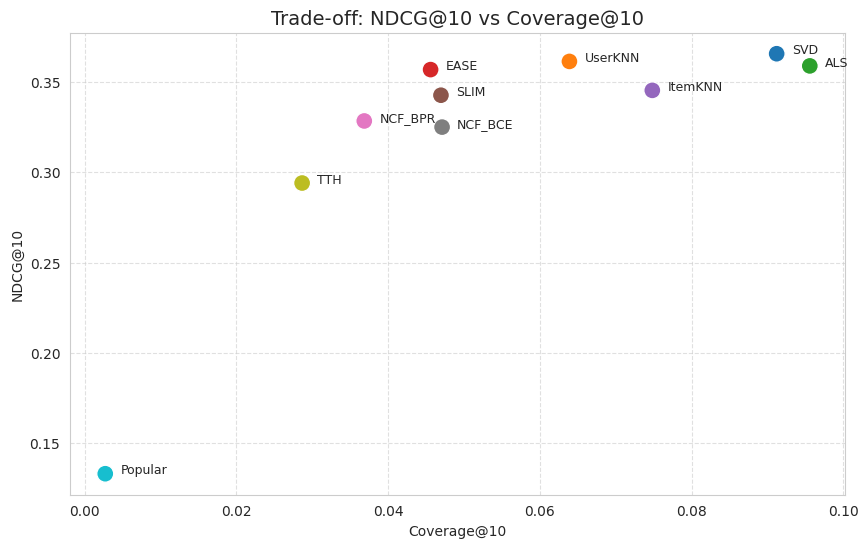

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='coverage@10', y='ndcg@10',
    hue='model_short', s=150
)
for _, row in df_plot.iterrows():
    plt.text(
        row['coverage@10'] + 0.002,
        row['ndcg@10'],
        row['model_short'],
        fontsize=9
    )
plt.title('Trade-off: NDCG@10 vs Coverage@10', fontsize=14)
plt.xlabel('Coverage@10')
plt.ylabel('NDCG@10')
plt.legend([],[], frameon=False)  # убираем легенду, так как подписи уже есть
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 05. Сравнительная таблица

In [17]:
# Ключевые метрики
metrics = ['hit_rate@10', 'ndcg@10', 'coverage@10']
summary = df_plot.set_index('model_short')[metrics].round(4)
print("Сравнительная таблица (лучшие модели):")
display(summary)

Сравнительная таблица (лучшие модели):


,hit_rate@10,ndcg@10,coverage@10
model_short,,,
SVD,0.8517,0.3655,0.0912
UserKNN,0.8361,0.3613,0.0639
ALS,0.8409,0.3588,0.0956
EASE,0.8385,0.3568,0.0456
ItemKNN,0.8122,0.3453,0.0748
SLIM,0.8254,0.3426,0.0470
NCF_BPR,0.8146,0.3283,0.0369
NCF_BCE,0.8014,0.3249,0.0471
TTH,0.7656,0.2940,0.0287


### Вспомним про **NCF_BCE_100**


| Модель         | HitRate@10 | Precision@10 | Recall@10 | NDCG@10 | MAP@10   | Coverage@10 |
|----------------|------------|--------------|-----------|---------|----------|--------------|
| NCF_BCE_100    | 0.8409     | 0.3239       | 0.0440    | 0.3387  | 0.2225   | **0.2968**   |

## 06. Выводы  
**1. Лучшая модель по качеству ранжирования**
- **Truncated SVD** (n_components=5) - лидер по NDCG@10 (0.3655) и HitRate@10 (0.8517).  
- **Почему:** использует явные рейтинги, что даёт богатый сигнал, недоступный implicit-моделям.

**2. Лучший баланс качества и разнообразия**  
- **ALS (factors=5)** - NDCG@10 = 0.3588, но Coverage@10 = 9.56% (максимум!).  
- **NCF_BCE_100** - Coverage@10 = 29.7%, но NDCG@10 = 0.3387 - лучшее разнообразие, но немного уступает в точности.  

**3. Классические и линейные модели**   
- **UserKNN (BM25)** - очень сильный baseline (NDCG@10 = 0.3613),
- **EASE** - быстрая closed-form модель (NDCG@10 = 0.3568), но низкое покрытие (4.56%),
- **SLIM** - точная, но медленная и узконаправленная (Coverage@10 = 4.70%).

**4. Нейросетевые модели (NCF)**
- **NCF (20 эпох)** - уступает SVD/ALS,
- **NCF_BCE_100** - демонстрирует потенциал для диверсификации, но требует длительного обучения и тонкой настройки..  

**5. Cold-start**    
- Для cold-пользователей - только Most Popular (HitRate@10 = 0.936)  
- Для low-activity - SVD устойчива, качество снижается, но остаётся выше Popular

**6. Гибридная модель: TwoTowerHybrid (TTH)**
- Качество: NDCG@10 = 0.2940, HitRate@10 = 0.7656 - значительно ниже SVD/ALS/NCF.  
- Покрытие: Coverage@10 = 2.87% — самое низкое среди всех моделей.    
  
  **Почему так?**    
  - Контентные фичи (genres + TF-IDF title) недостаточно информативны для компенсации потери collaborative сигнала,
  - Модель регуляризуется через контент, но теряет гибкость коллаборативных аналогов.  

  **Потенциал:**
  - В общем случае two-tower модели могут поддерживать и cold-user, и cold-item, если есть user и item features.